In [ ]:
pip install bnlp_toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 23.9 MB 1.2 MB/s 
     |████████████████████████████████| 1.3 MB 59.5 MB/s 
     |████████████████████████████████| 965 kB 84.9 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import numpy as np
import pandas as pd
import cv2
import re
from bnlp.corpus import stopwords, punctuations

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bnlp.corpus import stopwords, punctuations

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [ ]:
df = pd.read_csv("/content/শ্রীলঙ্কার অর্থনৈতিক সংকট.csv")
print(df.columns)
print(df.shape)
df.head()

FileNotFoundError: ignored

In [ ]:
df['paragraph'][:20].values

array(['উন্নয়নে মহাসড়কে আমরা এসব কি কথা বলে? যারা উন্নয়ন দেখতে পারেনা তাদের চোখের ডাক্তার দেখানো উচিত 😉',
       'উন্নয়নের নামে মেগা প্রকল্পে লুটপাট বন্ধ, দ্রব্য মূল্য নিয়ন্ত্রণ, ঘুষ দুর্নীতি বন্ধ, সুষ্ঠু নির্বাচন চালু, তোষামোদি পরিহার করে কাজে মনযোগী হওয়া দরকার। রাষ্ট্রিয় ব্যায় সংকোচন জরুরী।',
       'উন্নয়নের প্রধান শর্ত হল অব কাঠামো গত উন্নয়ন। যেমন উন্নত যোগাযোগ ব্যবসথা। আশা করা যায় আগামী ৫ বছরে বাংলাদেশে অবকাঠামো খাতে যে বৈপ্লবিক পরিবর্তন আসছে তা অর্থনীতির চাকাকে আরও বেগবান করবে। বার্ষিক জিডিপি ১০℅ উপরে কিম্বা এর বেশিও হতে পারে। এটাই আজকের বাস্তবতা।',
       'উপমহাদেশে যার যত চীন প্রীতি সে তত আর্থিক দুর্দশায় ভুগছে',
       'উবায়দুল্লাহ্ ইব্ন মূসা (রা) ……….. ইব্ন ‘উমর (রা) থেকে বর্ণিত, তিনি বলেন, রাসূলুল্লাহ (সাঃ) ইরশাদ করেন, ইসলামের ভিত্তি পাঁচটি।১। আল্লাহ ছাড়া ইলাহ্ নেই এবং নিশ্চয় মুহাম্মদ সাল্লাল্লাহু আলাইহি ওয়াসাল্লাম আল্লাহর রাসূল-এ কথার সাক্ষ্য দান।২। সালাত কায়েম করা।৩। যাকাত দেওয়া।৪। হজ্জ করা এবং৫। রমদান এর সিয়াম পালন করা।',
       'ঋণ করে ঘি খাওয

In [ ]:
def clean(text):
    text = re.sub('[%s]' % re.escape(punctuations), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\xa0', '', text)
    
    return text

cleaned_text = df['paragraph'].apply(lambda x: clean(str(x)))
cleaned_text

0      উন্নয়নে মহাসড়কে আমরা এসব কি কথা বলে যারা উন্...
1      উন্নয়নের নামে মেগা প্রকল্পে লুটপাট বন্ধ দ্রব্...
2      উন্নয়নের প্রধান শর্ত হল অব কাঠামো গত উন্নয়ন...
3      উপমহাদেশে যার যত চীন প্রীতি সে তত আর্থিক দুর্দ...
4      উবায়দুল্লাহ্ ইব্ন মূসা রা ……… ইব্ন ‘উমর রা থে...
                             ...                        
244    বাংলাদেশ দুনীতি ও দ্রব্যমুল্যের বৃদ্ধি প্রকল্প...
245      বাংলাদেশ নিয়ে এতো দরদের কি আছে  ❓বুঝিনা বাড়া
246     বাংলাদেশ নেক্সট আব্বা চিন বন্ধুদের এই অবস্থা করে
247    বাংলাদেশ বছরে রেমিট্যান্স পাই  বিলিয়ন এর উপরে...
248    বাংলাদেশ বর্তমানে শেখ্ হাসিনা র যোগ্য এবং দক্...
Name: paragraph, Length: 249, dtype: object

In [ ]:
refined_sentence = " ".join(cleaned_text)

In [ ]:
!wget https://www.omicronlab.com/download/fonts/kalpurush.ttf
!wget https://www.omicronlab.com/download/fonts/Nikosh.ttf
!wget https://www.omicronlab.com/download/fonts/Siyam%20Rupali%20ANSI.ttf

--2022-05-18 18:40:05--  https://www.omicronlab.com/download/fonts/kalpurush.ttf
Resolving www.omicronlab.com (www.omicronlab.com)... 172.104.46.32
Connecting to www.omicronlab.com (www.omicronlab.com)|172.104.46.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 314592 (307K) [application/octet-stream]
Saving to: ‘kalpurush.ttf.8’

kalpurush.ttf.8     100%[===================>] 307.22K   454KB/s    in 0.7s    

2022-05-18 18:40:07 (454 KB/s) - ‘kalpurush.ttf.8’ saved [314592/314592]

--2022-05-18 18:40:07--  https://www.omicronlab.com/download/fonts/Nikosh.ttf
Resolving www.omicronlab.com (www.omicronlab.com)... 172.104.46.32
Connecting to www.omicronlab.com (www.omicronlab.com)|172.104.46.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 795992 (777K) [application/octet-stream]
Saving to: ‘Nikosh.ttf.8’

Nikosh.ttf.8        100%[===================>] 777.34K   741KB/s    in 1.0s    

2022-05-18 18:40:09 (741 KB/s) - ‘Nikosh.ttf.8’ 

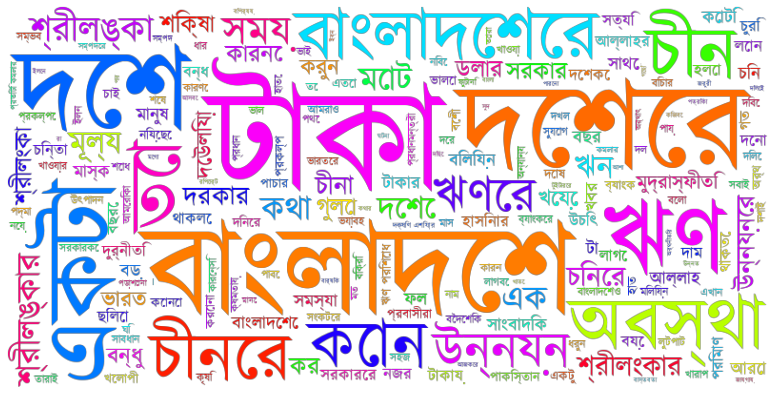

In [ ]:
regex = r"[\u0980-\u09FF]+"

wc = WordCloud(width=800, height=400, mode="RGBA",background_color=None, colormap="hsv",
               stopwords = stopwords, font_path="kalpurush.ttf", regexp=regex).generate(refined_sentence)

plt.figure(figsize=(15, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

result = wc.to_file("শ্রীলঙ্কার অর্থনৈতিক সংকট.png")